# Section 1: Business Understanding

From a quick look at the datasets, here are the queries we could propose regarding business questions

1. How's the booking trend in Seattle?
2. How's the average booking price through the year?
3. What affects the average booking price?

In [73]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
import warnings
warnings.filterwarnings("ignore")

# Section 2: Data Understanding

## Import Data

In [75]:
# Get the directory: 
d = os.getcwd() + '\data\\'

In [76]:
# Download csv files from https://www.kaggle.com/datasets/airbnb/seattle
# We will only need calendar.csv and listings.csv

# Calendar
calendar_df = pd.read_csv(d + 'calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Each row denotes the availability status and price of each listing for each day in 2016.

In [77]:
# Listings
listings_df = pd.read_csv(d + 'listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

Each row indicates all details in regards to each listing. More info of each column can be found at https://www.kaggle.com/datasets/airbnb/seattle

# Section 3: Data Preparation

## Clean

### Calendar

In [78]:
# Info
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [79]:
# Remove the $ from 'price' column and convert to float
calendar_df['price'] = calendar_df['price'].apply(lambda x: x.replace('$', '').replace(',', '') if type(x) != float else x)
calendar_df['price'] = calendar_df['price'].astype('float32')

In [80]:
# Change the 'date' field to datetime type
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [81]:
# Fill missing price value with value from rows above to get the latest price (data was already sorted by date)
calendar_df['price'] = calendar_df['price'].fillna(method='ffill')
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0
...,...,...,...,...
1393565,10208623,2016-12-29,f,87.0
1393566,10208623,2016-12-30,f,87.0
1393567,10208623,2016-12-31,f,87.0
1393568,10208623,2017-01-01,f,87.0


### Listings

In [82]:
# Preview
pd.set_option('display.max_columns', None)

listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [83]:
# List out columns we suspect that we could affect the price
cols = [
    'host_is_superhost',
    'neighbourhood',
    'smart_location',
    'property_type',
    'room_type',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'accommodates',
    'square_feet',
    'guests_included',
    'review_scores_rating',
    'cancellation_policy',
    'instant_bookable',
    'reviews_per_month',
    'price'
]

price_df = listings_df[cols]
price_df

,host_is_superhost,neighbourhood,smart_location,property_type,room_type,bathrooms,bedrooms,beds,bed_type,accommodates,square_feet,guests_included,review_scores_rating,cancellation_policy,instant_bookable,reviews_per_month,price
0,f,Queen Anne,"Seattle, WA",Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,4,NaN,2,95.0,moderate,f,4.07,$85.00
1,t,Queen Anne,"Seattle, WA",Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,4,NaN,1,96.0,strict,f,1.48,$150.00
2,f,Queen Anne,"Seattle, WA",House,Entire home/apt,4.5,5.0,7.0,Real Bed,11,NaN,10,97.0,strict,f,1.15,$975.00
3,f,Queen Anne,"Seattle, WA",Apartment,Entire home/apt,1.0,0.0,2.0,Real Bed,3,NaN,1,NaN,flexible,f,NaN,$100.00
4,f,Queen Anne,"Seattle, WA",House,Entire home/apt,2.0,3.0,3.0,Real Bed,6,NaN,6,92.0,strict,f,0.89,$450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,f,Fremont,"Seattle, WA",House,Entire home/apt,2.0,3.0,3.0,Real Bed,6,NaN,1,80.0,strict,f,0.30,$359.00
3814,f,Portage Bay,"Seattle, WA",Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,4,NaN,3,100.0,moderate,f,2.00,$79.00
3815,f,NaN,"Seattle, WA",House,Entire home/apt,1.0,1.0,1.0,Real Bed,2,NaN,2,NaN,moderate,f,NaN,$93.00
3816,f,NaN,"Seattle, WA",Condominium,Entire home/apt,1.0,0.0,1.0,Real Bed,2,NaN,1,NaN,moderate,f,NaN,$99.00


In [84]:
# Info
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_is_superhost     3816 non-null   object 
 1   neighbourhood         3402 non-null   object 
 2   smart_location        3818 non-null   object 
 3   property_type         3817 non-null   object 
 4   room_type             3818 non-null   object 
 5   bathrooms             3802 non-null   float64
 6   bedrooms              3812 non-null   float64
 7   beds                  3817 non-null   float64
 8   bed_type              3818 non-null   object 
 9   accommodates          3818 non-null   int64  
 10  square_feet           97 non-null     float64
 11  guests_included       3818 non-null   int64  
 12  review_scores_rating  3171 non-null   float64
 13  cancellation_policy   3818 non-null   object 
 14  instant_bookable      3818 non-null   object 
 15  reviews_per_month    

In [85]:
# Create 'rooms' column
price_df['rooms'] = price_df['bathrooms'] + price_df['bedrooms']

In [86]:
# Remove the $ from 'price' column and convert to float
price_df['price'] = price_df['price'].apply(lambda x: x.replace('$', '').replace(',', '') if type(x) != float else x)
price_df['price'] = price_df['price'].astype('float32')
price_df['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float32

In [87]:
# smart_location: fix typos
price_df['smart_location'] = price_df['smart_location'].apply(lambda x: 'Seattle, WA' if x in ['Seattle , WA', 'seattle, wa', '西雅图, WA'] else x)

# Section 4: Insights and Visualization

## 1. How's the booking trend in Seattle?

In [88]:
# Filter out unavailable
unavai_df = calendar_df[calendar_df['available'] == 'f']
unavai_df

,listing_id,date,available,price
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0
5,241032,2016-01-09,f,85.0
6,241032,2016-01-10,f,85.0
...,...,...,...,...
1393565,10208623,2016-12-29,f,87.0
1393566,10208623,2016-12-30,f,87.0
1393567,10208623,2016-12-31,f,87.0
1393568,10208623,2017-01-01,f,87.0


In [89]:
# Sum of price by date
date_price_df = unavai_df.groupby('date').price.sum()
date_price_df

date
2016-01-04    275030.0
2016-01-05    257100.0
2016-01-06    257241.0
2016-01-07    262425.0
2016-01-08    258124.0
                ...   
2016-12-29    133304.0
2016-12-30    132255.0
2016-12-31    127499.0
2017-01-01    115992.0
2017-01-02    140212.0
Name: price, Length: 365, dtype: float32

In [90]:
# Booked

listing_num = calendar_df['listing_id'].nunique()

booked_df = calendar_df[calendar_df['available'] == 'f'].groupby('date').listing_id.nunique()
booked_df = booked_df.reset_index()
booked_df['booked'] = round(booked_df['listing_id']/listing_num * 100,2)
booked_df

,date,listing_id,booked
0,2016-01-04,2083,54.56
1,2016-01-05,1951,51.10
2,2016-01-06,1992,52.17
3,2016-01-07,2042,53.48
4,2016-01-08,2036,53.33
...,...,...,...
360,2016-12-29,983,25.75
361,2016-12-30,978,25.62
362,2016-12-31,959,25.12
363,2017-01-01,896,23.47


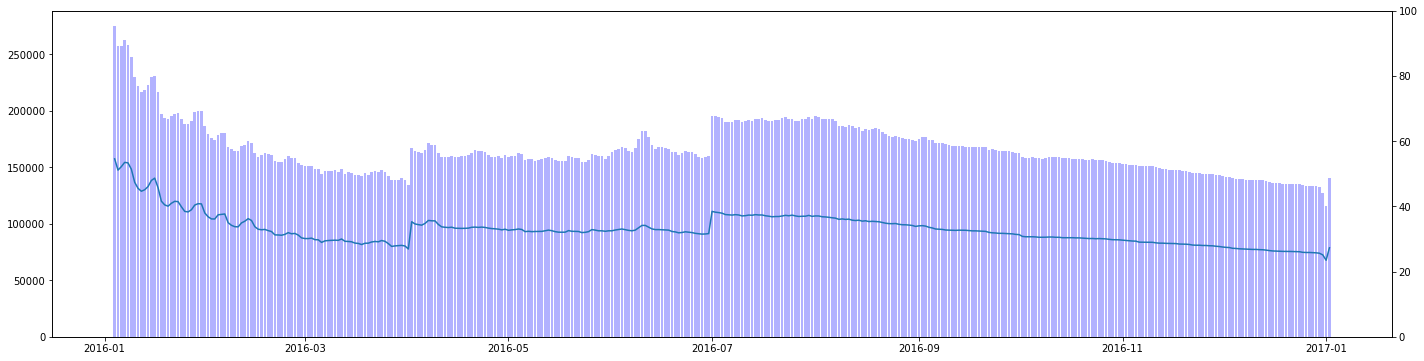

In [91]:
# Plot

fig, ax = plt.subplots(1, 1, figsize = (24, 6))

x = date_price_df.index
y = date_price_df.values
y2 = booked_df['booked']

ax.bar(x, y, color = 'b', alpha=0.3)
ax.xaxis_date()

ax2 = ax.twinx()
ax2.plot(x, y2)
ax2.set_ylim(0,100)

plt.show()

The booking trend seems to be split in three parts. While the bars cover the total revenue and the line shows the availability percentage, those two metrics are quite parallel and follow the overall aforementioned trends.

The first portion from January to March shows a steep slope then sudden increase happens in the next month. Another spike occurs in the beginning of July and it’s descending again for the rest of the year.

## 2. How's the average booking price through the year?

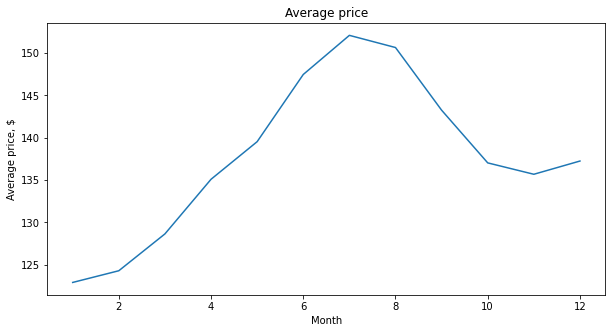

In [92]:
# Average price by month
avai_df = calendar_df[calendar_df['available'] == 't']
avai_df['month'] = avai_df['date'].apply(lambda x: x.month)

average_price_df = avai_df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(average_price_df)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.show()

The second graph covers the average booking price in 2016. The peak period appears to be in the summer months. Although, it’s worth to notice the price range consistently stays from 120 to 150 and doesn’t go outside of that range.

## 3. How's the average booking price through the year?

### Define function

In [93]:
def agg_df(col):
    """
    Get mean of price on the attribute 'col' when col is categorical data
    """
    temp_df = price_df[[col, 'price']].dropna()
    temp_df = temp_df.groupby(col).price.mean().sort_values(ascending=False)
    return temp_df

In [94]:
def num_agg_df(col, bins=4):
    """
    Get mean of price on the attribute 'col' when col is numerical data (col is split into bins)
    """
    temp_df = price_df[[col, 'price']].dropna()
    temp_df['bins'] = pd.cut(temp_df[col], bins=bins)
    temp_df = temp_df.groupby('bins').price.mean()
    temp_df.index = list(map(lambda x: str(x)[1:-1].replace(',', ' ->'), list(temp_df.index)))
    return temp_df

In [95]:
def hbar_plot(temp_df, col, figsize, top=None):
    """
    Plot horizonal bar chart:
    temp_df: the dataframe
    col: x label
    figsize: size of the fig
    top: get the top result
    """
    plt.figure(figsize=figsize)
    
    width = 0.4
    
    plt.barh(temp_df[:top].index, temp_df[:top].values, width, color=(8/255, 29/255, 88/255))
    plt.gca().invert_yaxis()

    plt.xlabel('Average price, $')
    plt.ylabel(col)


In [96]:
def bar_plot(temp_df, col, figsize, top=None):
    """
    Plot bar chart:
    temp_df: the dataframe
    col: x label
    figsize: size of the fig
    top: get the top result
    """
    plt.figure(figsize=figsize)
        
    plt.bar(temp_df[:top].index, temp_df[:top].values)

    plt.xlabel(col)
    plt.ylabel('Average price, $')

### Visualize

#### Location

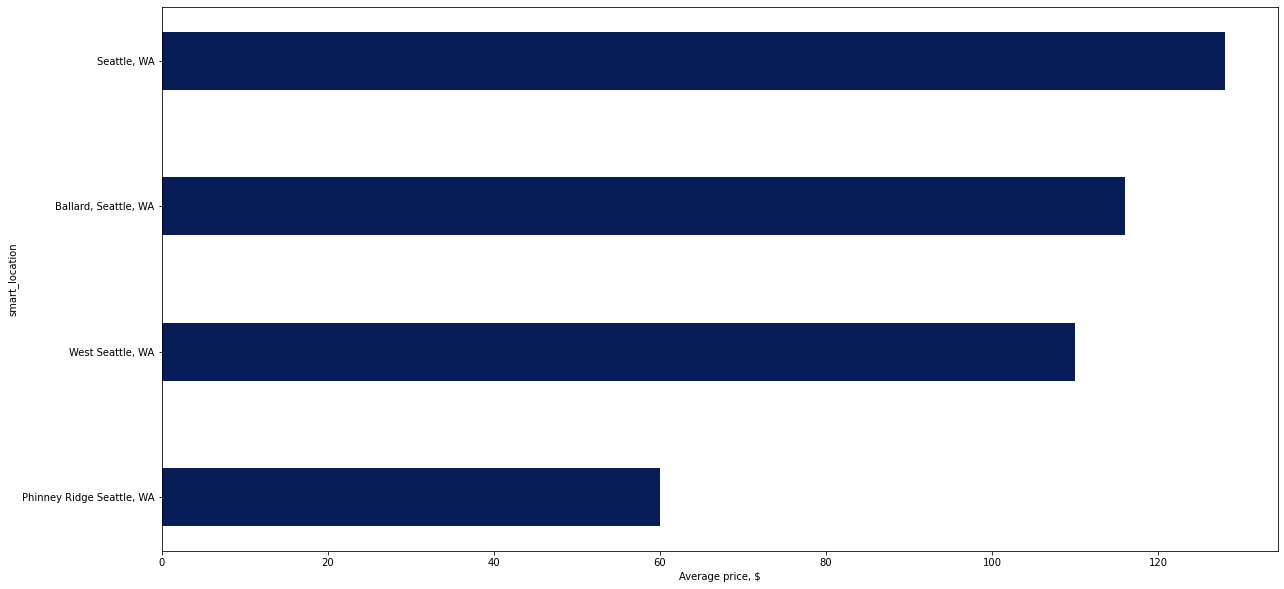

In [97]:
col = 'smart_location'

temp_df = agg_df(col)
temp_df

hbar_plot(temp_df, col=col, figsize =(20,10))

#### neighbourhood

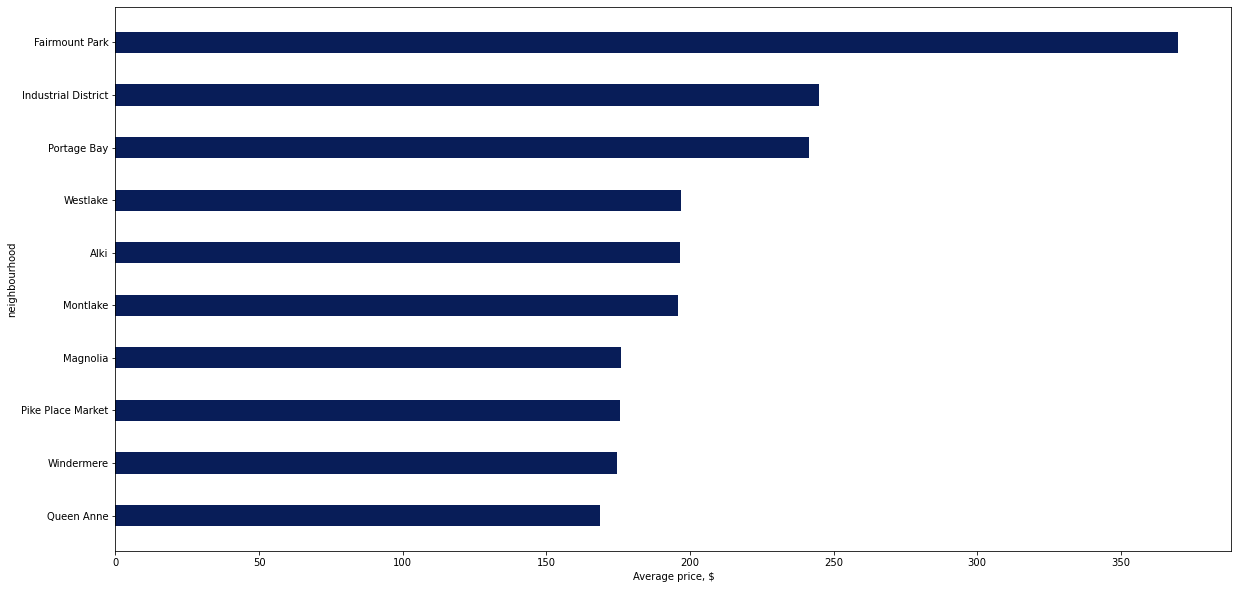

In [98]:
col = 'neighbourhood'

temp_df = agg_df(col)
temp_df

hbar_plot(temp_df, col=col, figsize =(20,10), top=10)


#### Property type

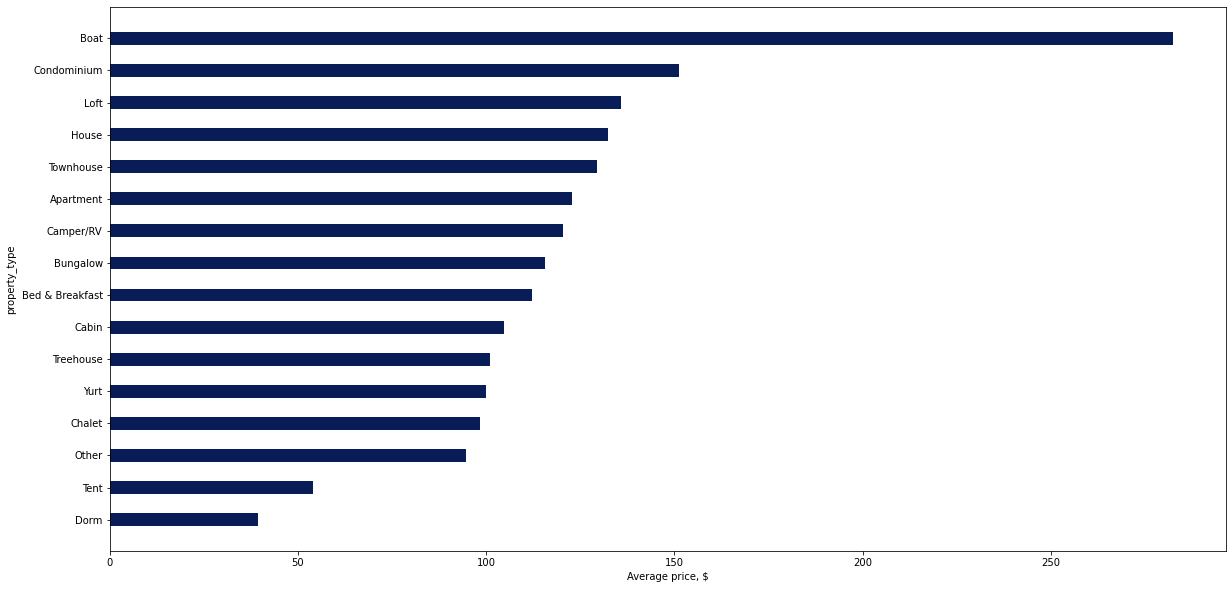

In [99]:
col = 'property_type'

temp_df = agg_df(col)
temp_df

hbar_plot(temp_df, col=col, figsize =(20,10))

#### Room type

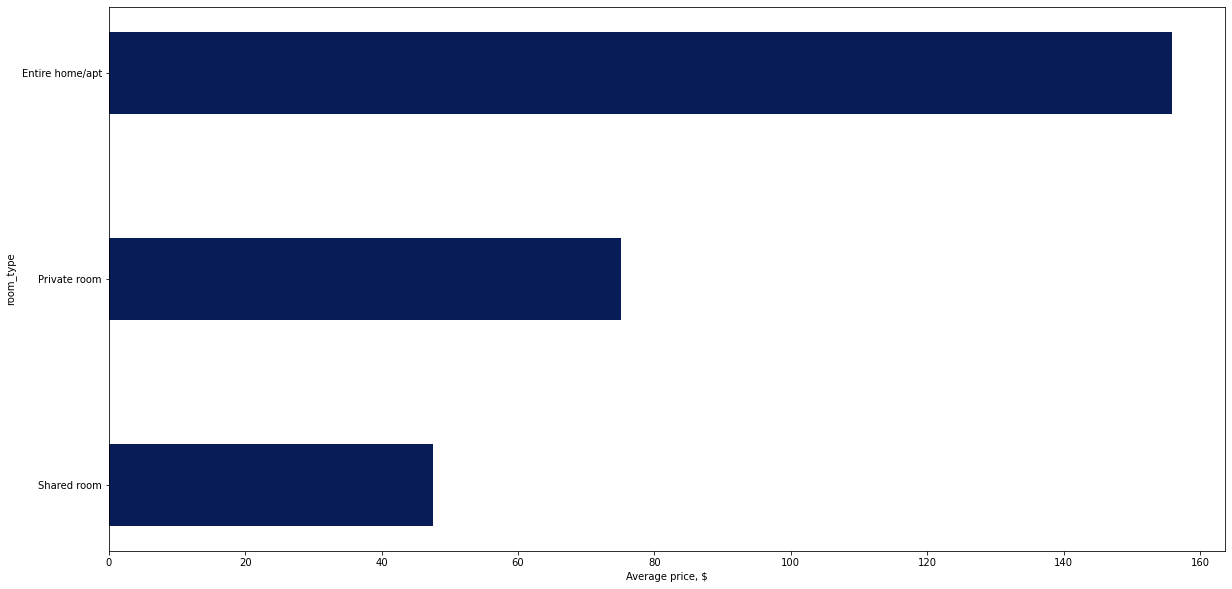

In [100]:
col = 'room_type'

temp_df = agg_df(col)
temp_df

hbar_plot(temp_df, col=col, figsize =(20,10))



#### Bed type

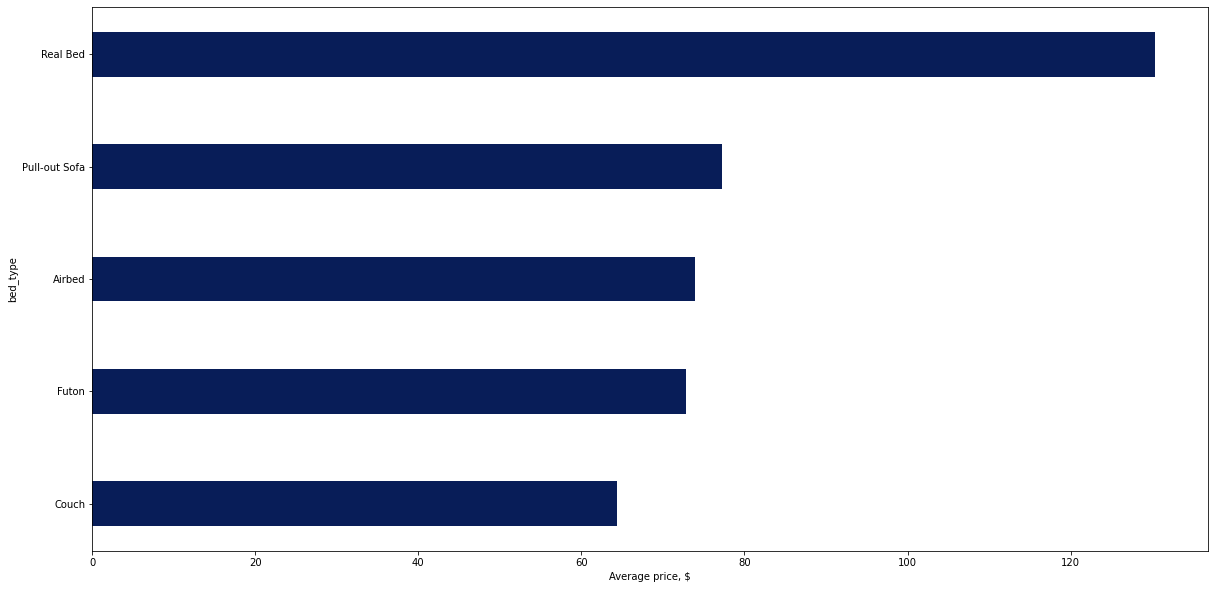

In [101]:
col = 'bed_type'

temp_df = agg_df(col)
temp_df

hbar_plot(temp_df, col=col, figsize =(20,10))

#### Cancellation Policy

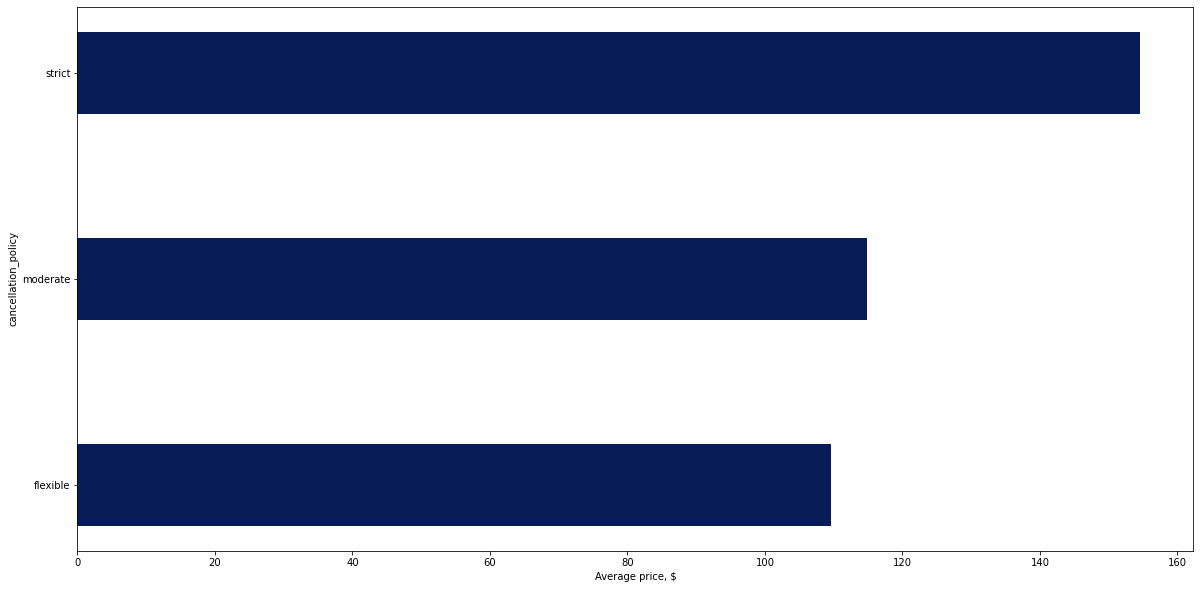

In [102]:
col = 'cancellation_policy'

temp_df = agg_df(col)
temp_df

hbar_plot(temp_df, col=col, figsize =(20,10))

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Host is superhost

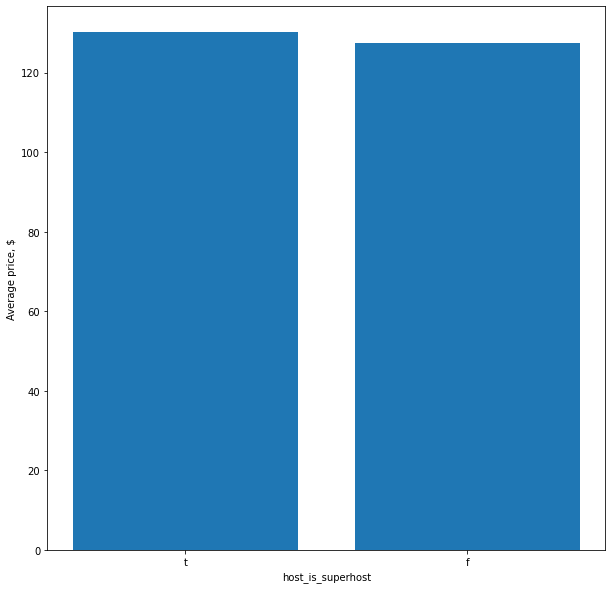

In [103]:
col = 'host_is_superhost'

temp_df = agg_df(col)
temp_df

bar_plot(temp_df, col=col, figsize =(10,10))

#### instant bookable

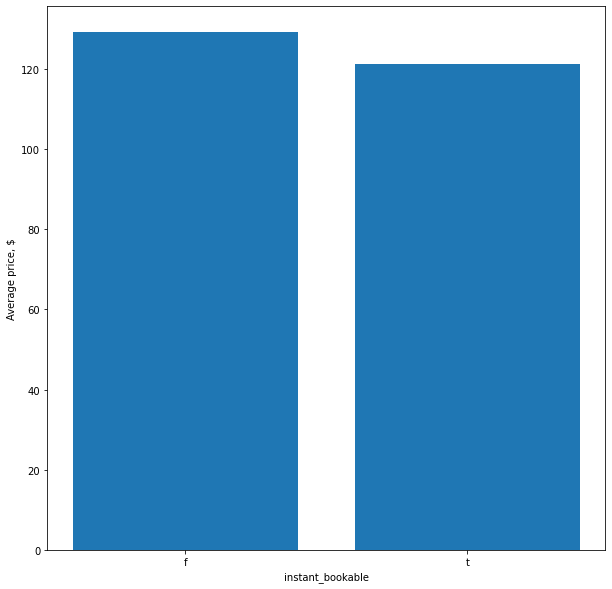

In [104]:
col = 'instant_bookable'

temp_df = agg_df(col)
temp_df

bar_plot(temp_df, col=col, figsize =(10,10))

#### Rooms

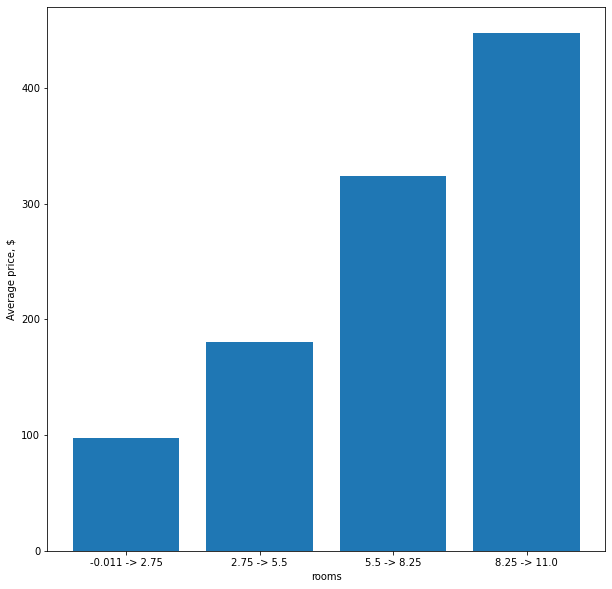

In [105]:
col = 'rooms'

temp_df = num_agg_df('rooms')
bar_plot(temp_df, col=col, figsize =(10,10))

#### Beds

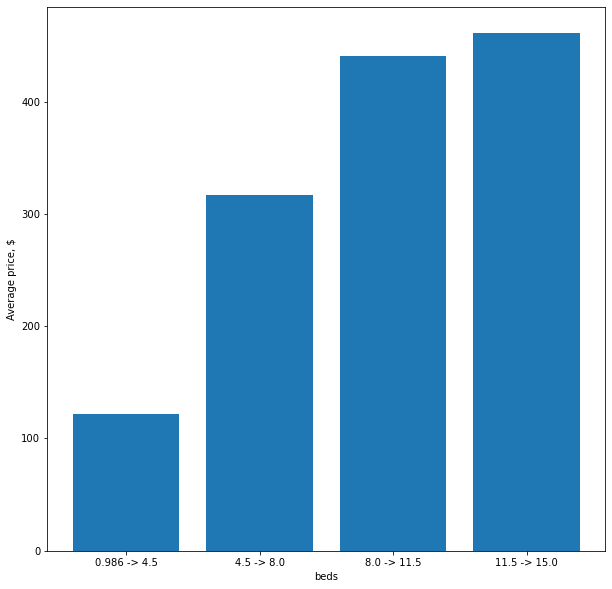

In [106]:
col = 'beds'

temp_df = num_agg_df('beds')
bar_plot(temp_df, col=col, figsize =(10,10))

#### Review scores rating

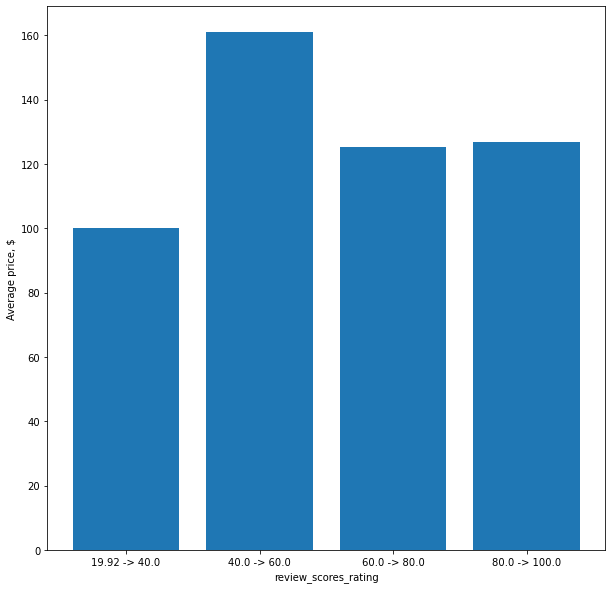

In [107]:
col = 'review_scores_rating'

temp_df = num_agg_df('review_scores_rating')
bar_plot(temp_df, col=col, figsize =(10,10))

Through a series of horizontal bar charts, we can consider what kind of rental that will fit our budget.

# Conclusion

In this article, we took a look at Seattle Airbnb in 2016 according to Kaggle dataset:

1. From the sudden spike in data, we can investigate further and figure out what happened during that particular period.
2. We then looked at the how different factors that could impact the overall booking price.